In [ ]:
%run taxiFarePrediction_NN_model.ipynb

In [6]:
#!pip install seaborn
#!pip install dtreeviz
#matplotlib.rcParams.update({'font.size': 22})

In [4]:
# Let's start with standard libraries
from numpy.random import seed
import os
import datetime 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
#feature scaling (not necessary)
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
X_train = training_set
X_test = test_set

#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(training_label.reshape(-1, 1))
y_train = training_label
y_test = test_label

In [15]:
#Define Parameters
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 5)]
n_estimators = [int(x) for x in np.linspace(10, 40, num = 4)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_features = ['auto', 'sqrt']

param_grid = dict(min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  n_estimators=n_estimators,
                  max_depth = max_depth,
                  max_features = max_features)

# Build the grid search
rfr = RandomForestRegressor(random_state = 2022)
grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv = 5)

######USED SUBSET
grid_results = grid.fit(X_train[:2000], y_train[:2000])

#result
print("Best params:{}".format(grid_results.best_params_))

Best params:{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}


In [16]:
list(grid_results.best_params_.values())

[20, 'auto', 4, 10, 30]

In [17]:
rfr_best = RandomForestRegressor(n_estimators=list(grid_results.best_params_.values())[4],  
                                min_samples_split=list(grid_results.best_params_.values())[3], 
                                min_samples_leaf=list(grid_results.best_params_.values())[2],
                                max_depth = list(grid_results.best_params_.values())[0],
                                max_features = list(grid_results.best_params_.values())[1],
                                random_state = 2022)

In [18]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=30, random_state=2022)

In [19]:
y_pred = rfr_best.predict(X_test)

In [44]:
#train predictition
y_train_pred = rfr_best.predict(X_train)

In [222]:
plt.style.use('default')
#plt.style.use('seaborn-dark')

In [223]:
plt.style.use('seaborn-whitegrid')

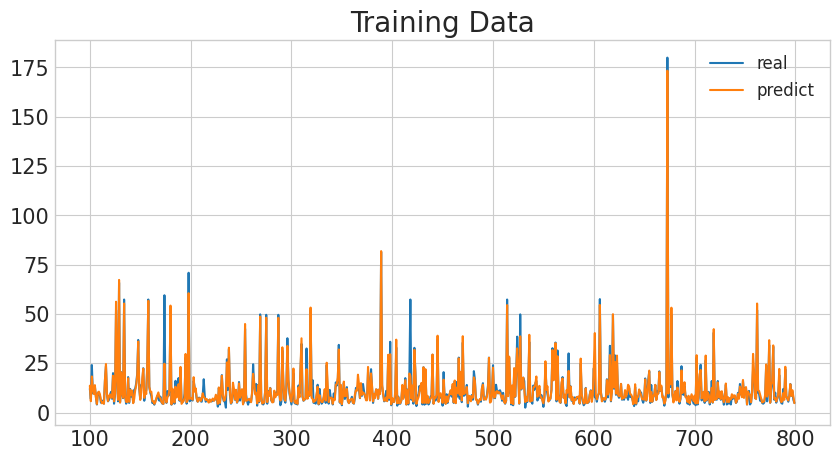

In [224]:
draw_train=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_pred)],axis=1)
draw_train.iloc[100:800,0].plot(figsize=(10,5),fontsize='15')
draw_train.iloc[100:800,1].plot(figsize=(10,5),fontsize='15')
plt.legend(('real', 'predict'),loc='upper right',fontsize='12')
plt.title("Training Data",fontsize='20') 
plt.savefig('training data.png')

In [109]:
import sklearn.metrics as metrics
#metrics for training set
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_train, y_train_pred)

print("Model Performance(training set): ")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Model Performance(training set): 
MAE: 1.3644621738437197
MSE: 7.590485021764178
RMSE: 2.7550834872584495
R-Squared: 0.9173605446007896


In [130]:
x_val = validation_set
y_val = validation_label
y_val_pred = rfr_best.predict(x_val)

In [131]:
#Validation set 
#metrics for training set
mae = metrics.mean_absolute_error(y_val, y_val_pred)
mse = metrics.mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_val, y_val_pred)

print("Model Performance(validation set): ")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Model Performance(validation set): 
MAE: 1.53616173257968
MSE: 10.95955980059823
RMSE: 3.310522587235772
R-Squared: 0.8804989872407153


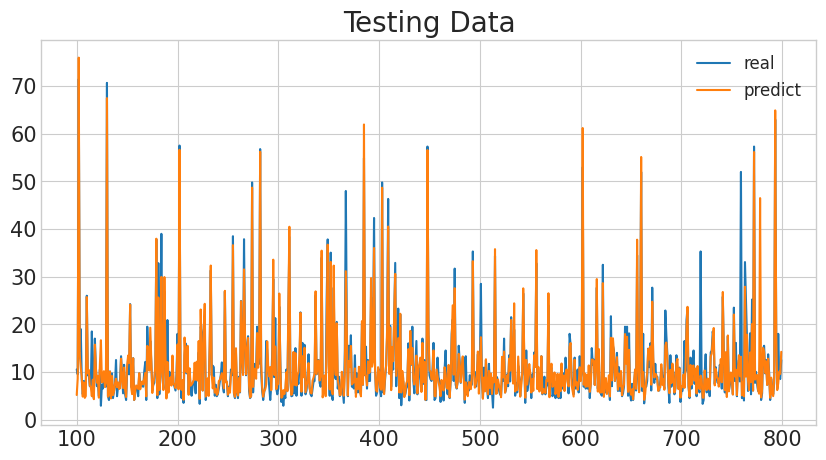

In [225]:
#test data 

draw_test=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
draw_test.iloc[100:800,0].plot(figsize=(10,5),fontsize='15')
draw_test.iloc[100:800,1].plot(figsize=(10,5),fontsize='15')
plt.legend(('real', 'predict'),loc='upper right',fontsize='12')
plt.title("Testing Data",fontsize='20')
plt.savefig('test_data.png')
plt.savefig('testing data.png')

In [107]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("Model Performance(test set): ")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Model Performance(test set): 
MAE: 1.5257084895782906
MSE: 10.538157720365787
RMSE: 3.246252873755491
R-Squared: 0.8836390715064124


In [21]:
rfr_best.estimators_[-1]

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=592055802)

[Text(0.6658851602902999, 0.9761904761904762, 'X[1] <= 1.055\nsquared_error = 91.356\nsamples = 3029683\nvalue = 11.32'),
 Text(0.3911610982280917, 0.9285714285714286, 'X[1] <= -0.029\nsquared_error = 27.756\nsamples = 2782838\nvalue = 9.241'),
 Text(0.15722134875514424, 0.8809523809523809, 'X[1] <= -0.368\nsquared_error = 15.376\nsamples = 2065227\nvalue = 7.424'),
 Text(0.030290599881600568, 0.8333333333333334, 'X[1] <= -0.769\nsquared_error = 16.325\nsamples = 1213172\nvalue = 6.246'),
 Text(0.006375758265295627, 0.7857142857142857, 'X[8] <= -0.001\nsquared_error = 851.084\nsamples = 6290\nvalue = 22.925'),
 Text(0.004661896612126736, 0.7380952380952381, 'X[2] <= 4.871\nsquared_error = 540.236\nsamples = 5923\nvalue = 19.525'),
 Text(0.0018212284707056056, 0.6904761904761905, 'X[2] <= -1.054\nsquared_error = 452.519\nsamples = 5149\nvalue = 16.562'),
 Text(0.00029921277768653234, 0.6428571428571429, 'X[4] <= 1.258\nsquared_error = 523.678\nsamples = 333\nvalue = 49.038'),
 Text(0.00

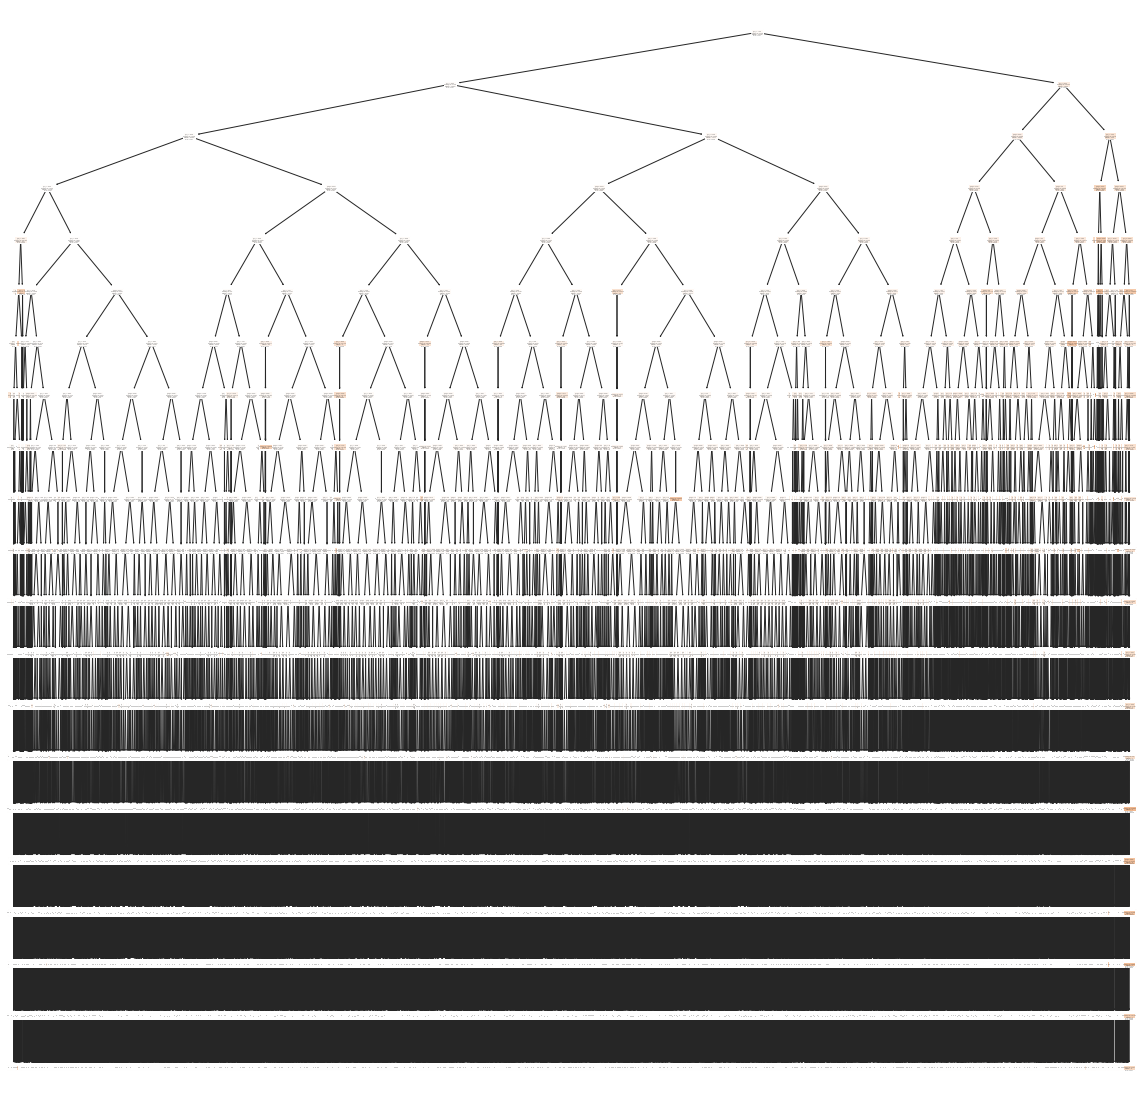

In [43]:
from sklearn import tree
plt.figure(figsize = (20,20))
tree.plot_tree(rfr_best.estimators_[-1], filled = True)

In [37]:
#from sklearn import tree
#Test report of the last decision tree
print(tree.export_text(rfr_best.estimators_[-1]))

|--- feature_1 <= 1.06
|   |--- feature_1 <= -0.03
|   |   |--- feature_1 <= -0.37
|   |   |   |--- feature_1 <= -0.77
|   |   |   |   |--- feature_8 <= -0.00
|   |   |   |   |   |--- feature_2 <= 4.87
|   |   |   |   |   |   |--- feature_2 <= -1.05
|   |   |   |   |   |   |   |--- feature_4 <= 1.26
|   |   |   |   |   |   |   |   |--- feature_16 <= -0.81
|   |   |   |   |   |   |   |   |   |--- feature_16 <= -0.84
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.77
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  -0.77
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- feature_16 >  -0.84
|   |   |   |   |   |   |   |   |   |   |--- value: [12.23]
|   |   |   |   |   |   |   |   |--- feature_16 >  -0.81
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.02
|   |   |   |   |   |   |   |   |   |   |--- value: [20.59]


In [42]:
#import dtreeviz
#from dtreeviz.trees import dtreeviz
#viz = dtreeviz(rfr_best.estimators_[-1],X_test, y_test)

In [24]:
rfr_best.feature_importances_

array([5.41139870e-04, 8.42237670e-01, 5.86933316e-03, 3.84739609e-03,
       2.95850259e-03, 2.60473031e-02, 5.23337401e-03, 4.96537998e-03,
       7.69136638e-03, 1.19116124e-02, 3.20495067e-03, 8.57434363e-03,
       1.92417518e-02, 3.02094019e-03, 5.22111368e-03, 1.62586944e-04,
       3.11144892e-02, 1.09535108e-04, 2.65783248e-03, 1.96373268e-03,
       2.14983817e-03, 1.30922561e-03, 1.26201094e-03, 1.93248401e-04,
       1.85721963e-04, 3.02319406e-04, 3.06650625e-04, 1.32035915e-03,
       1.35330680e-03, 1.62104105e-03, 5.67207245e-04, 1.23618557e-03,
       1.15682841e-03, 1.99368954e-04, 2.62333847e-04])

In [124]:
plt.style.use('fivethirtyeight')

In [219]:
def plotImp(model, num = 40, fig_size = (20, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,
                                'Feature':[
                                'passenger_count',
                                'distance_in_miles',
                                'pickup_x',
                                'pickup_y',
                                'pickup_z',
                                'dropoff_x',
                                'dropoff_y',
                                'dropoff_z',
                                'pickup_to_JFK_distance',
                                'dropoff_to_JFK_distance',
                                'pickup_to_NYC_distance',
                                'dropoff_to_NYC_distance',
                                'delta_longitude',
                                'delta_latitude',
                                'direction',
                                'year',
                                'linear_time',
                                'peak_hours',
                                'surcharge',
                                'hour_sin',
                                'hour_cos',
                                'minute_sin',
                                'minute_cos',
                                'time_type_of_day_sin',
                                'time_type_of_day_cos',
                                'month_sin',
                                'month_cos',
                                'day_sin',
                                'day_cos',
                                'weekday_sin',
                                'weekday_cos',
                                'weekofyear_sin',
                                'weekofyear_cos',
                                'quarterofyear_sin',
                                'quarterofyear_cos'
                                ]})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 2)
    sns.barplot(x = "Value", y = "Feature", data = feature_imp.sort_values(by="Value", 
                                                        ascending = False)[0:10])
    plt.title('Random Forest Feature_Importance')
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png')
    plt.show()

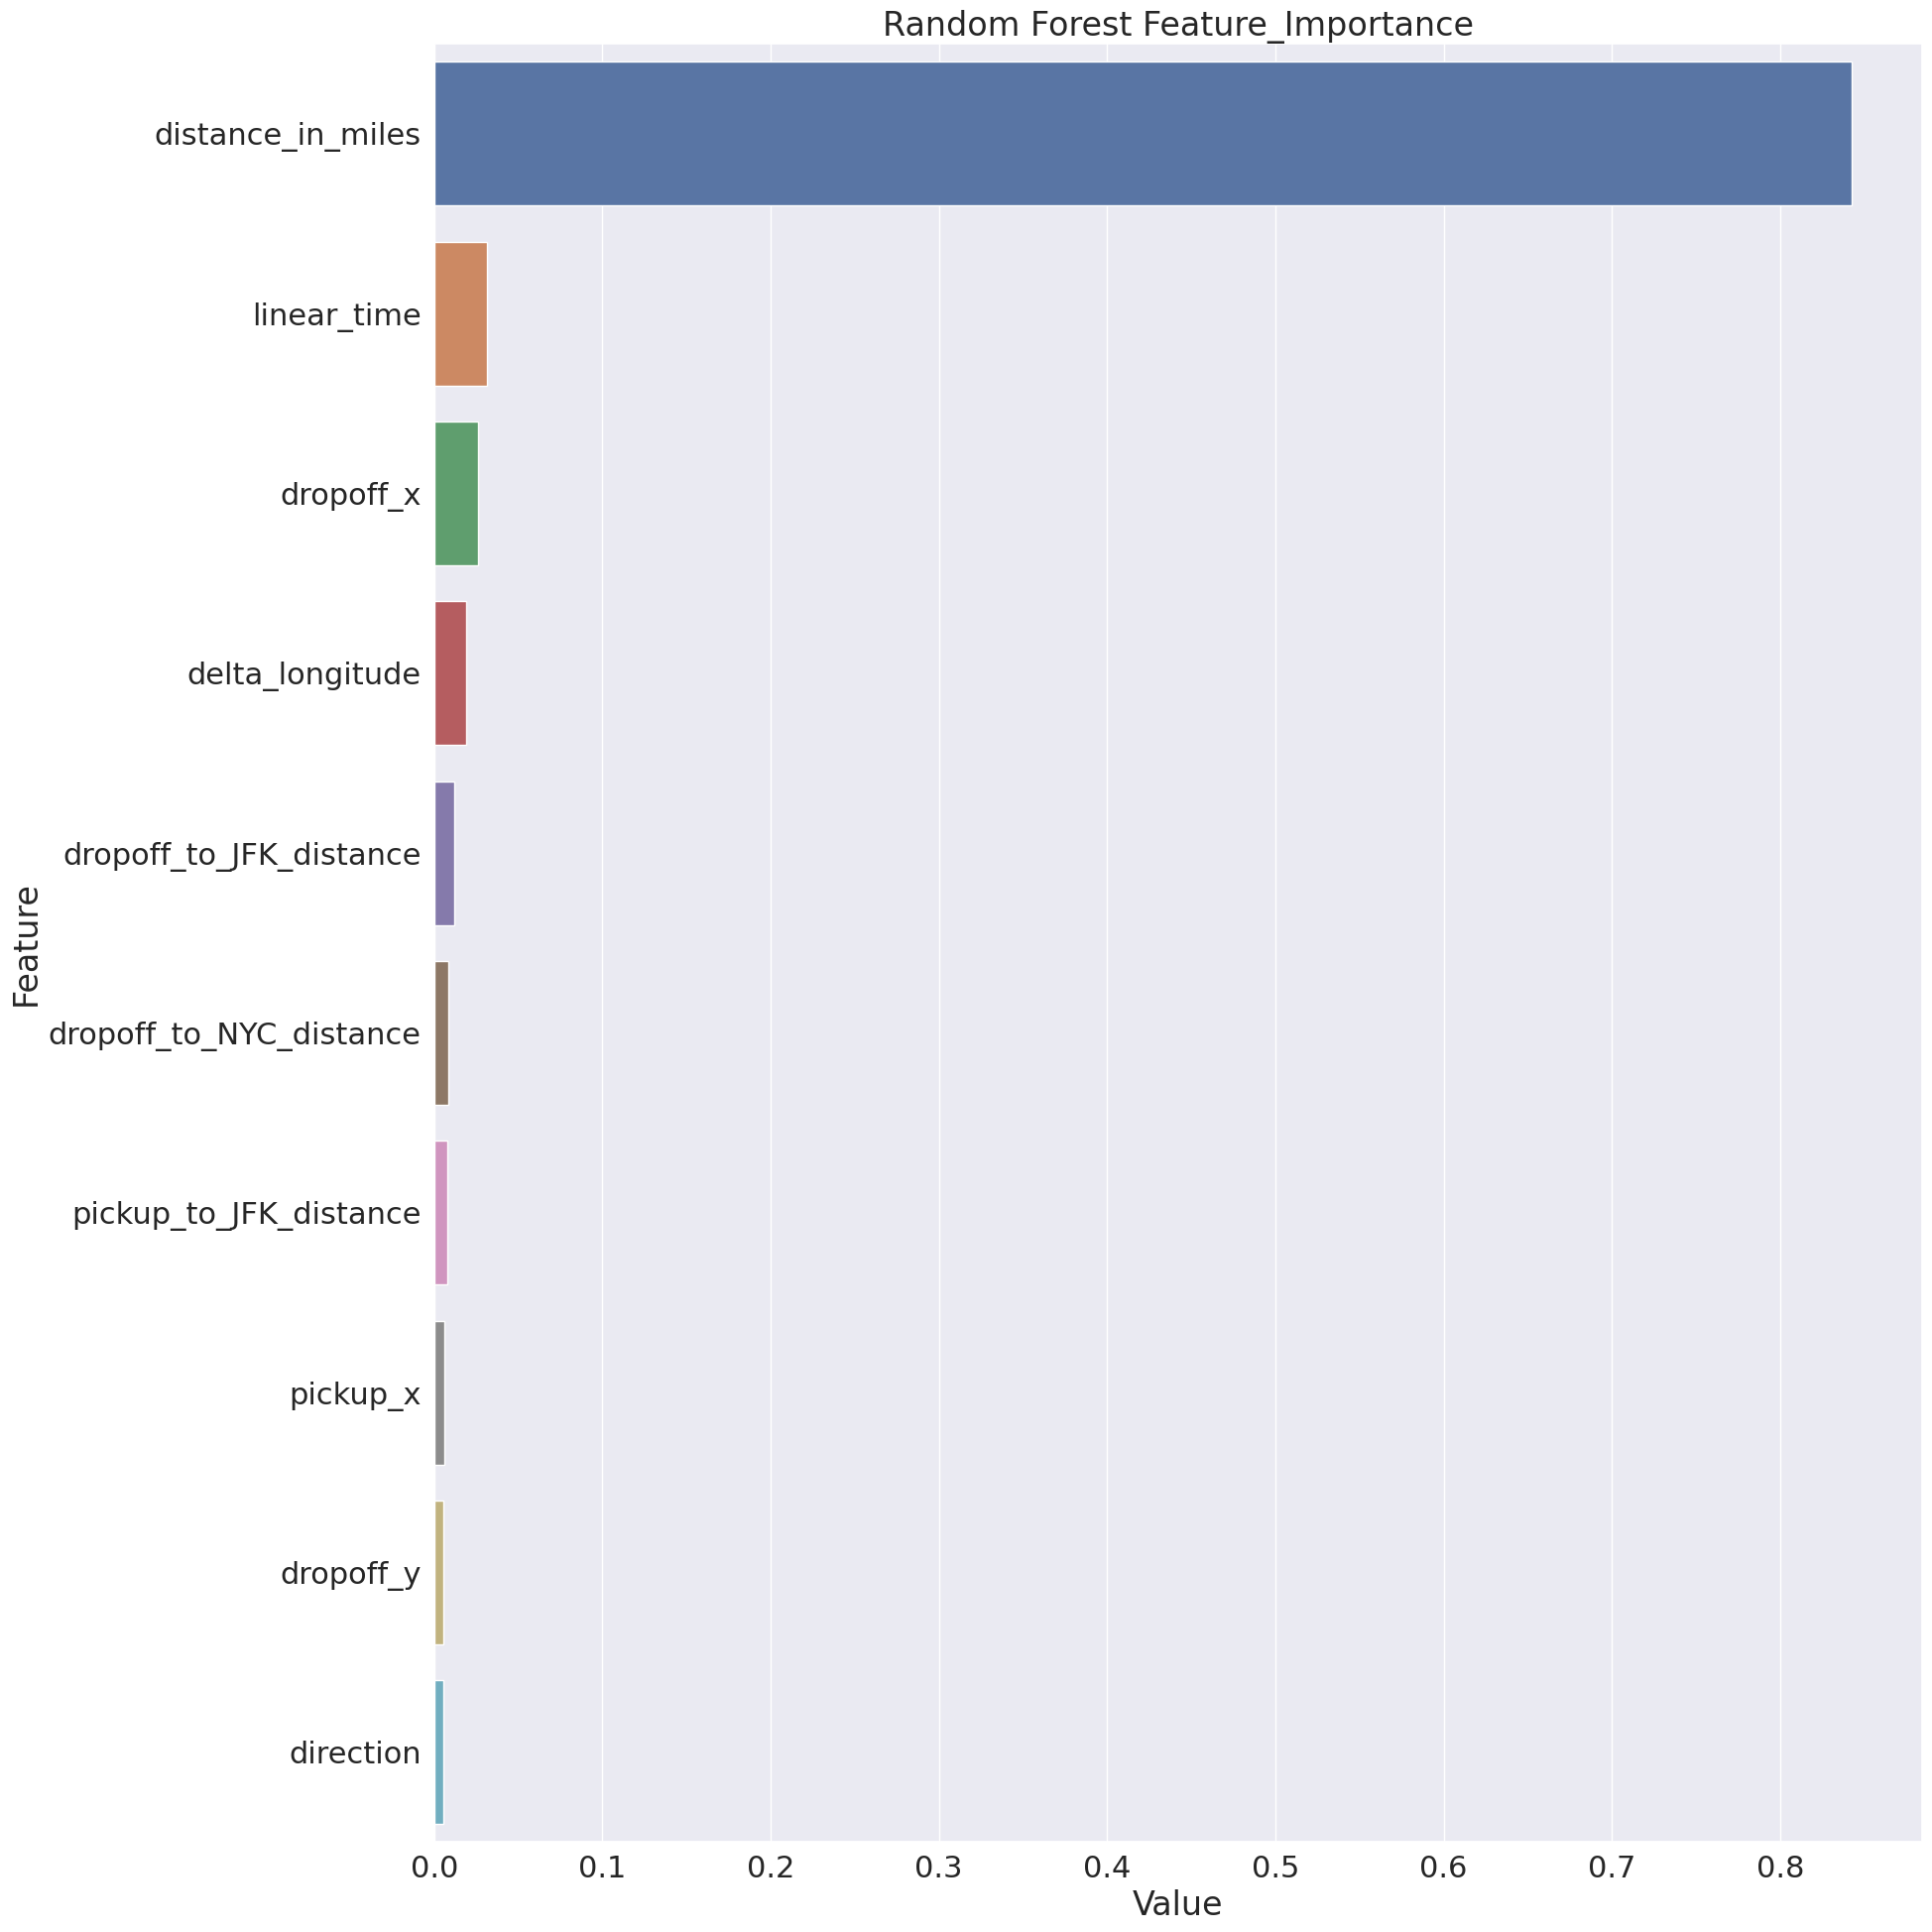

In [220]:
plotImp(rfr_best)

In [229]:
selected_features = [#'distance_in_miles', 
                     'linear_time', 
                     'dropoff_x',
                     'delta_longitude',
                     'dropoff_to_JFK_distance',
                     #'dropoff_to_NYC_distance',
                     #'pickup_to_JFK_distance',
                     ]
#t_val_subset = df_tval[selected_features]

In [230]:
# Extract the training features and standardize the values
df_subset_x = df_subset.loc[:, selected_features].values

In [231]:
sample_x = df_subset_x[:400]
sample_x.shape

(400, 4)

In [232]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sample_x = sc.fit_transform(sample_x)

In [233]:
# Extract the training label
df_subset_label = df_subset.loc[:, 'fare_amount'].values

In [234]:
sample_y = df_subset_label[:400]
sample_y.shape

(400,)

In [235]:
df_ = pd.DataFrame(sample_x, columns = selected_features)
df_['fare_amount'] = sample_y

In [236]:
df_

,linear_time,dropoff_x,delta_longitude,dropoff_to_JFK_distance,fare_amount
0,-1.528766,4.121802,-0.043772,-4.244038,4.5
1,-1.223777,-0.128391,-0.976839,0.759329,16.9
2,-0.342614,-0.482962,0.263016,0.250443,5.7
3,0.026949,-0.496169,0.151663,0.435222,7.7
4,-1.130141,0.564950,-0.283042,0.307875,5.3
...,...,...,...,...,...
395,-0.967029,-0.425546,-0.253390,0.347540,7.3
396,0.662920,-0.332737,-0.037201,0.797963,4.5
397,0.788452,0.581537,-0.677499,-0.052157,13.0
398,-1.081728,0.060105,0.220221,-0.014382,5.7


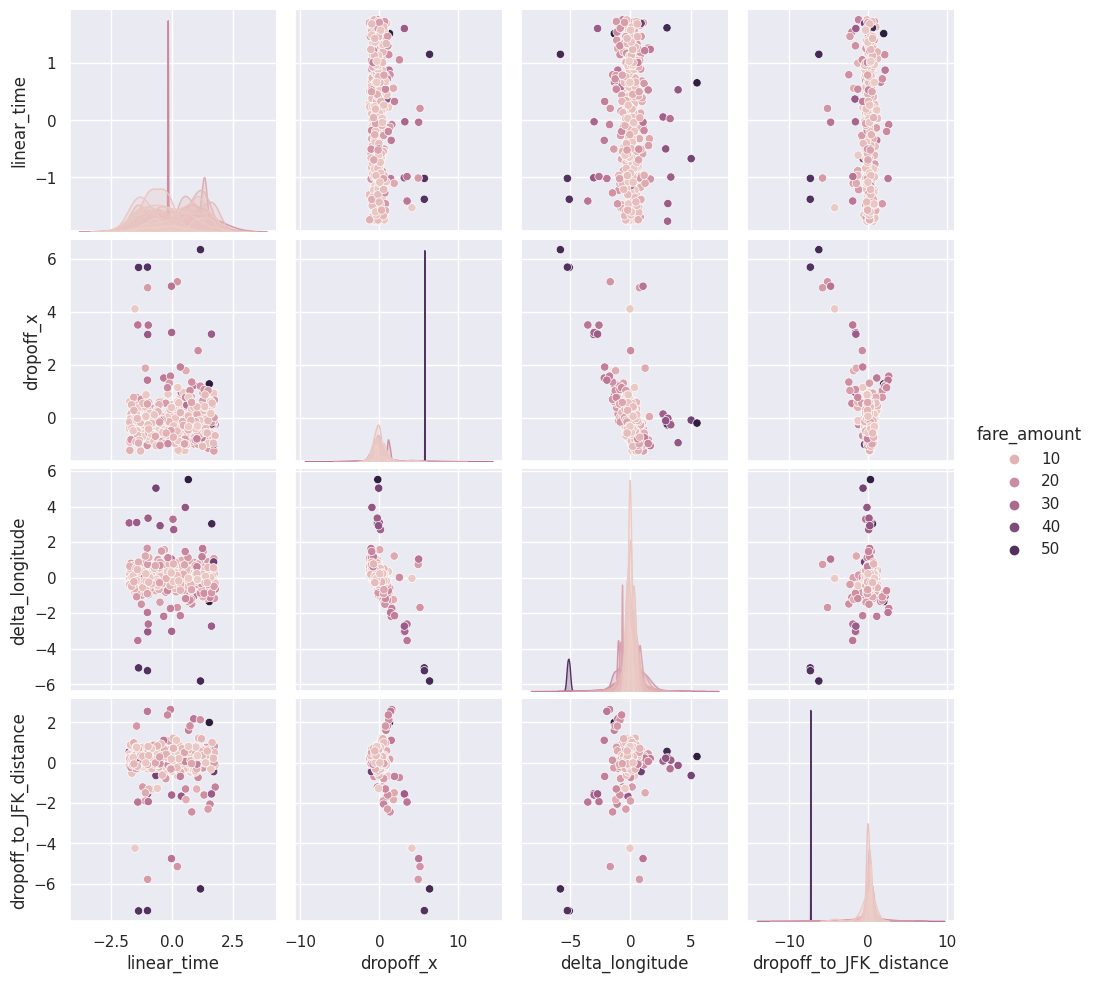

In [237]:
#exclude distance_in_miles
sns.set(font_scale = 1)
sns.pairplot(df_, 
             hue ='fare_amount')
plt.savefig('pairplot_new.png')